# Assignment Prep - K Means

For this part of the assignment, we will use Yahoo finance. Yfinance is the package that will construct our dataset.

- You need to pick 5 stocks (Tickers). Reference - https://stockanalysis.com/stocks/

- In the 2nd cell, you will need to replace the text "YOUR TICKERS GO HERE" with comma separated Tickers i.e. ["AAPL","MSFT","SPY","KO","AMZN"].

- Do not use the same stocks outlined in the above example.

- The 1st cell contains installation commands for specific package versions. Do not change them else the dataset generation code will not work.

- Once you enter your tickers, run the cell, in the folders tab in the left side of your colab screen, you will be able to see the .csv files.

In [1]:
!pip install yfinance==0.1.62
!pip install pandas==1.3.5

  Preparing metadata (setup.py) ... done
  Created wheel for yfinance: filename=yfinance-0.1.62-py2.py3-none-any.whl size=23863 sha256=6efee85ca39052747a8b19936f47f1c834295734602184813cfae93f31e38695
  Stored in directory: /root/.cache/pip/wheels/6f/d0/b4/131b11c0c2dd0e3869e4f50c11498c2859f8c31b3d72775521
Successfully built yfinance
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.36
    Uninstalling yfinance-0.2.36:
      Successfully uninstalled yfinance-0.2.36
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 20.8 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is n

In [2]:
from pandas_datareader import data as web
import os
import pandas as pd
import yfinance as yf

def get_stock(ticker, start_date, end_date):
    try:
        df = yf.download(ticker, start=start_date, end=end_date)
        df['Ticker'] = ticker
        df['Return'] = df['Adj Close'].pct_change()
        df['Return'].fillna(0, inplace = True)
        df['Date'] = df.index
        df['Date'] = pd.to_datetime(df['Date'])
        df['Month'] = df['Date'].dt.month
        df['Year'] = df['Date'].dt.year
        df['Day'] = df['Date'].dt.day
        for col in ['Open', 'High', 'Low', 'Close', 'Adj Close']:
            df[col] = df[col].round(2)
        df['Weekday'] = df['Date'].dt.day_name()
        df['Week_Number'] = df['Date'].dt.strftime('%U')
        df['Year_Week'] = df['Date'].dt.strftime('%Y-%U')
        col_list = ['Ticker','Date', 'Year', 'Month', 'Day', 'Weekday',
                    'Week_Number', 'Year_Week', 'Open',
                    'High', 'Low', 'Close', 'Volume', 'Adj Close',
                    'Return']
        df = df[col_list]
        return df
    except Exception as error:
        print(error)
        return None

ticker=["NFLX","DIS","WBD","FOX","PARAA"] # ["AAPL","MSFT","SPY","KO","AMZN"]
for stock in ticker:
    try:
        input_dir = os.getcwd()
        output_file = os.path.join(input_dir, stock + '.csv')
        df = get_stock(stock, start_date='2022-01-01', end_date='2022-12-31')
        df.to_csv(output_file, index=False)
        print('wrote ' + str(len(df)) + ' lines to file: ' + output_file)
    except Exception as e:
        print(e)
        print('Failed to fetch data for', stock)

[*********************100%***********************]  1 of 1 completed
wrote 251 lines to file: /content/NFLX.csv
[*********************100%***********************]  1 of 1 completed
wrote 251 lines to file: /content/DIS.csv
[*********************100%***********************]  1 of 1 completed
wrote 251 lines to file: /content/WBD.csv
[*********************100%***********************]  1 of 1 completed
wrote 251 lines to file: /content/FOX.csv
[*********************100%***********************]  1 of 1 completed
wrote 251 lines to file: /content/PARAA.csv


### This cell is for installing any python packages you want to use

In [3]:
!pip install your-package-name

# Question 1 - Feature Engineering

Merge all 5 datasets.

In [4]:
from pathlib import Path
import pandas as pd
import numpy as np

path = '/content/'
files = Path(path).glob('*.csv')

data = pd.concat((pd.read_csv(f) for f in files), ignore_index=True)
data

,Ticker,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return
0,FOX,2022-01-03,2022,1,3,Monday,1,2022-01,34.42,35.33,34.31,34.99,1100700,33.94,0.000000
1,FOX,2022-01-04,2022,1,4,Tuesday,1,2022-01,35.19,35.63,35.06,35.13,1296500,34.08,0.004001
2,FOX,2022-01-05,2022,1,5,Wednesday,1,2022-01,35.14,35.60,34.68,34.76,1028300,33.72,-0.010532
3,FOX,2022-01-06,2022,1,6,Thursday,1,2022-01,34.94,35.91,34.89,35.48,1162800,34.42,0.020713
4,FOX,2022-01-07,2022,1,7,Friday,1,2022-01,35.48,36.22,35.48,36.00,1167400,34.92,0.014656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,NFLX,2022-12-23,2022,12,23,Friday,51,2022-51,296.18,298.46,291.91,294.96,4251100,294.96,-0.009370
1251,NFLX,2022-12-27,2022,12,27,Tuesday,52,2022-52,293.19,293.57,282.13,284.17,5778100,284.17,-0.036581
1252,NFLX,2022-12-28,2022,12,28,Wednesday,52,2022-52,281.92,285.19,273.41,276.88,5964400,276.88,-0.025654
1253,NFLX,2022-12-29,2022,12,29,Thursday,52,2022-52,283.18,295.50,281.01,291.12,9588500,291.12,0.051430


Create four new features - **(9 Points)**

- Mean Return
- Volatility (Standard Deviation)
- High Low Spread (High price - Low price)
- Average Trading volume

Basically, you will need to create a new dataset, wherein each week for each ticker will be represented by a single row. This dataset should have columns - Ticker, Week_Number, Mean_Return, Volatility, High_Low_Spread, Average_Trading_Volume. For example, the mean_return for a week with respect to a stock will be the mean of returns for all the days in that week.

*Hint: For each ticker, there should be around 52 data points in the new dataset.*

**Answer 1**
---

In [5]:
# Grouping by 'Ticker' and 'Week_Number' columns and creating a new dataframe
new_data = pd.DataFrame(data.groupby(by=['Ticker','Week_Number'],
                                     sort=False, as_index=False).agg({'Return':['mean','std'], 'High':'max',
                                                                      'Low':'min', 'Volume':'mean'}))

# Renaming columns
new_data.columns = ['Ticker', 'Week_Number', 'Mean_Return', 'Volatility', 'High', 'Low', 'Average_Trading_Volume']

# Calculating the High_Low_Spread column
new_data.insert(loc=4, column='High_Low_Spread', value=new_data['High'] - new_data['Low'])

# Dropping 'High','Low' columns that are not required
new_data.drop(columns=['High','Low'], axis=1, inplace=True)

new_data

,Ticker,Week_Number,Mean_Return,Volatility,High_Low_Spread,Average_Trading_Volume
0,FOX,1,0.005768,0.012293,1.91,1151140.0
1,FOX,2,0.009322,0.011339,2.22,1021540.0
2,FOX,3,-0.019612,0.012436,3.46,939375.0
3,FOX,4,0.010970,0.029398,2.20,1303460.0
4,FOX,5,0.002950,0.007995,1.60,960580.0
...,...,...,...,...,...,...
255,NFLX,48,0.023939,0.040414,46.05,10783180.0
256,NFLX,49,-0.000029,0.023517,26.90,9001860.0
257,NFLX,50,-0.018359,0.039736,46.17,12050580.0
258,NFLX,51,0.003031,0.017752,19.85,6313060.0


# Question 2 - K Means


On the new dataset created in the previous question, perform K means clustering with k = 3 *based on the following features only: Volatility, High Low Spread, and Average Trading volume*. Use a custom initialization by randomly selecting 3 data points from the dataset as initial centroids.

*Use these features for clustering in all upcoming questions.*

*Perform any necessary pre-processing*

**(4 points)**

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Defining the number of clusters
k = 3

# Subsetting the data
df = new_data[['Volatility','High_Low_Spread','Average_Trading_Volume']]

# Preprocessing (scaling) the data for clustering
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Performing KMeans clustering
kmeans_result = KMeans(n_clusters=k, init='random', n_init='auto').fit(df_scaled)

# Assigning cluster centers
df_scaled['cluster_labels'] = kmeans_result.labels_

df_scaled.head()

,Volatility,High_Low_Spread,Average_Trading_Volume,cluster_labels
0,-0.951063,-0.476085,-0.789575,0
1,-1.005677,-0.457509,-0.802209,0
2,-0.942855,-0.383202,-0.810219,0
3,0.028566,-0.458707,-0.774726,0
4,-1.197218,-0.494662,-0.808152,0


Create two 3D figures using plotly:
- a plot with points colored based on the clustering obtained above.
- a plot with points colored based on the clustering obtained by initializing the centroids to some outliers. You are welcome to find these outliers visually or numerically.

Which clustering scheme was better? How did you make that evaluation? Explain thoroughly.

*For the upcoming questions, answer based on the best of the two clusterings you just plotted.*

**(3 Points)**

In [7]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Plot with random initializations for the centroids

centroids_random = pd.DataFrame(kmeans_result.cluster_centers_, columns=['x', 'y', 'z'])

fig = px.scatter_3d(df_scaled, x='Volatility', y='High_Low_Spread', z='Average_Trading_Volume', color='cluster_labels')
fig.update_traces(marker_size = 3) # makes the points smaller (better visualization)

centroid_plot = go.Scatter3d (
    x=centroids_random['x'],
    y=centroids_random['y'],
    z=centroids_random['z'],
    name='centroids',
    mode='markers',
    marker_symbol='x',
    marker_color ='green',
    marker_size = 4
)

fig.add_trace(centroid_plot)
fig.show()

In [8]:
# Selecting 3 outliers from the above 3D plot
outliers = [[7.28,7.89,3.98], [-0.78,3.71,-0.49], [2.68,3.11,0.55]]

# Performing KMeans clustering
kmeans_result_outliers = KMeans(n_clusters=k, init=np.array(outliers), n_init=1).fit(df_scaled[['Volatility',
                                                                                                'High_Low_Spread',
                                                                                                'Average_Trading_Volume']])
# Assigning cluster centers
df_scaled['cluster_labels_outliers'] = kmeans_result_outliers.labels_

df_scaled.head()

,Volatility,High_Low_Spread,Average_Trading_Volume,cluster_labels,cluster_labels_outliers
0,-0.951063,-0.476085,-0.789575,0,1
1,-1.005677,-0.457509,-0.802209,0,1
2,-0.942855,-0.383202,-0.810219,0,1
3,0.028566,-0.458707,-0.774726,0,1
4,-1.197218,-0.494662,-0.808152,0,1


In [9]:
# Plot with outliers initialized as centroids

centroids_outliers = pd.DataFrame(kmeans_result_outliers.cluster_centers_, columns=['x', 'y', 'z'])
centroids_outliers

fig = px.scatter_3d(df_scaled, x='Volatility', y='High_Low_Spread', z='Average_Trading_Volume', color='cluster_labels_outliers')
fig.update_traces(marker_size = 3) # makes the points smaller (better visualization)

centroid_plot = go.Scatter3d (
    x=centroids_outliers['x'],
    y=centroids_outliers['y'],
    z=centroids_outliers['z'],
    name='centroids',
    mode='markers',
    marker_symbol='x',
    marker_color ='green',
    marker_size = 4
)

fig.add_trace(centroid_plot)
fig.show()

**Answer 2**
---
Based on the above two plots, one with random centroid initialization and the other with initializing outliers as centroids, the latter returns slightly better separated clusters as compared to the former. Although the difference is not so tangible, we do see better separation after using outliers as centroids. This is because when we assign the farthest points in the space as centroids, the new formed clusters will pull the inner, closely placed points in the direction of those outliers, which will eventually lead to better cluster boundaries or a clearer separation.

Looking at the resulting clustering

1. Do you think the different clusters highlight specific segments or trends in the stock market?
2. Is the obtained clustering related to "Mean Return"? Explain you answer with the proper visualizations.

**(2 Points)**

In [10]:
# 1. Do the different clusters highlight specific segments or trends in the stock market?
df_final = pd.concat([new_data, df_scaled['cluster_labels_outliers']], axis=1)

df_final.groupby('cluster_labels_outliers').agg({'Volatility':['mean','median','min','max'],
                                                 'High_Low_Spread':['mean','median','min','max'],
                                                 'Average_Trading_Volume':['mean','median','min','max']})

Volatility                                \
                              mean    median       min       max   
cluster_labels_outliers                                            
0                         0.130360  0.130360  0.104628  0.156093   
1                         0.022438  0.022033  0.005207  0.058621   
2                         0.044965  0.042020  0.021786  0.091705   

                        High_Low_Spread                          \
                                   mean  median     min     max   
cluster_labels_outliers                                           
0                            144.140000  144.14  141.63  146.65   
1                              7.390518    3.20    0.80   71.77   
2                             13.039538    4.05    0.73   61.84   

                        Average_Trading_Volume                          \
                                          mean      median         min   
cluster_labels_outliers                                                  
0                                 3.513610e+07  35136097.5  20188975.0   
1                                 5.105781e+06   1619320.0     29720.0   
2                                 2.076033e+07  19763480.0     68460.0   

                                     
                                max  
cluster_labels_outliers              
0                        50083220.0  
1                        24602375.0  
2                        64315980.0

In [11]:
df_final.groupby(['Ticker','cluster_labels_outliers'], as_index=False)['Week_Number'].count()

,Ticker,cluster_labels_outliers,Week_Number
0,DIS,1,45
1,DIS,2,7
2,FOX,1,52
3,NFLX,0,2
4,NFLX,1,30
5,NFLX,2,20
6,PARAA,1,49
7,PARAA,2,3
8,WBD,1,17
9,WBD,2,35


**Answer 2.1**
---
The different clusters do seem to highlight different segments in the stock market.
- Cluster 0: Represents stocks with really high trading volume with a median of 35 million. This group of stocks also has a larger spread between high and low prices with median spread as 144. Surprisingly, this cluster only comprises of Netflix stocks.
- Cluster 1: Represents stocks on the lower end of trading volume with a median of 1.6 million and a low median spread of 3.2.
- Cluster 2: Represents medium level stocks in terms of the median trading volume of about 19 million and a medium level of spread at 13.03.

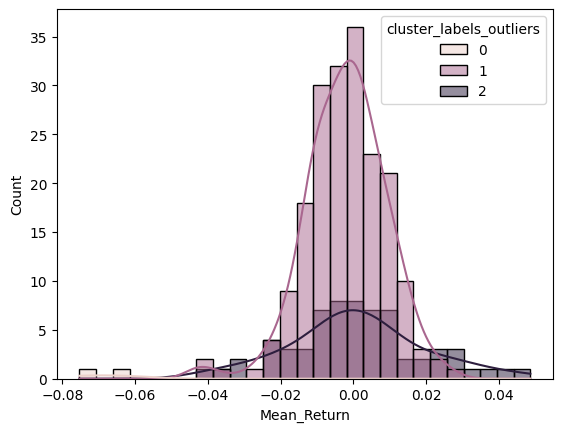

In [12]:
# 2. Is the obtained clustering related to "Mean Return"?
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df_final, x='Mean_Return', hue='cluster_labels_outliers', kde=True)
plt.show();

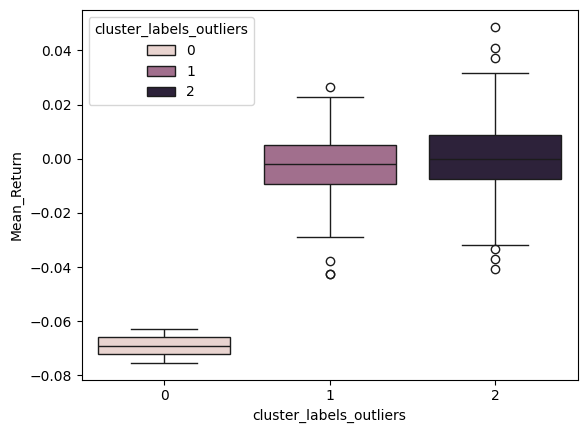

In [13]:
sns.boxplot(data=df_final, x='cluster_labels_outliers', y='Mean_Return', hue='cluster_labels_outliers')
plt.show();

**Answer 2.2**
---
As seen above, the obtained clustering sort of relates to `Mean_Return` in the sense that we see the value of mean returns to be significantly different between cluster 0 and clusters 1 & 2. Although, not much differentiation can be made between clusters 1 and 2 on the basis on this metric.

# Question 3 - Optimal K

### For both Optimal K questions, 2 <= k <= 10.

### Also present any visualizations if necessary.

Write python code to determine optimal k using the elbow method. **(2 Points)**

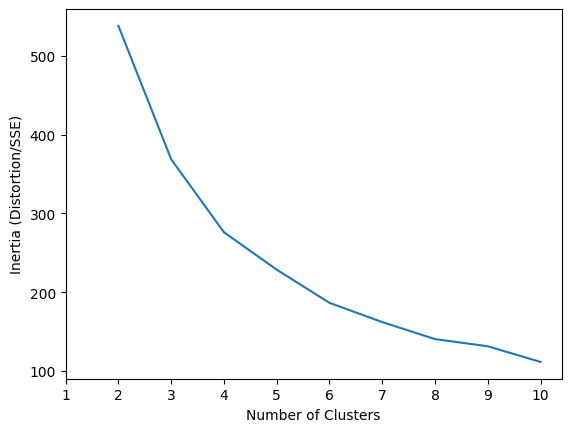

In [14]:
# Finding optimal k using Elbow Plot

df_kmeans = df_scaled[['Volatility','High_Low_Spread','Average_Trading_Volume']]

# A list to hold the inertia/distortion values for each k between 2-10
inertia = []

# Calculating inertia for each 'k'
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='random', n_init='auto')
    kmeans.fit(df_kmeans)
    inertia.append(kmeans.inertia_)

# Visualizing the Elbow Plot
plt.plot(range(2, 11), inertia)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (Distortion/SSE)")
plt.show();

Write python code to determine optimal k using the silhouette method. **(2 Points)**

Reference: https://vitalflux.com/kmeans-silhouette-score-explained-with-python-example/

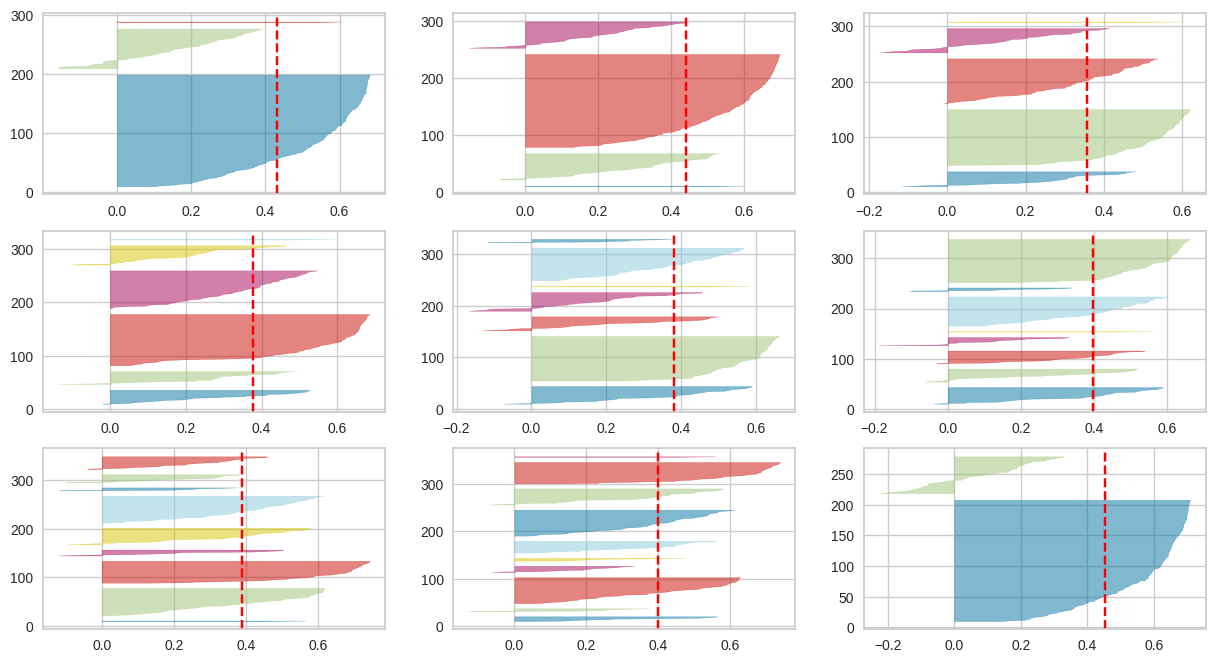

In [15]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3, 3, figsize=(15,8))

for k in range(2,11):
    kmeans = KMeans(n_clusters=k, init='random', n_init='auto', random_state=42)

    q, mod = divmod(k, 3)

    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_kmeans)

Considering both methods, what do you think should be the optimal K. Explain in details? **(2 Points)**

**Answer 3**
---
Considering both the Elbow Plot and the Silhouette Visualizer, we can decude that the optimal K can be considered as 4. This can be seen with the slight bend (elbow) in the first plot and also can be confirmed by looking at the Silhouette plot of four clusters that showcases a higher average silhouette score of about 4.25 and all the clusters crossing this average (red line). It should be noted that these visualizations give only a rough idea of what might be optimal.


# Question 4 - Hierarchical Clustering

Perform Hierarchical Clustering with K ranging from 2 to 11. Use the silhouette score to determine optimal K. Plot a graph with K on the X-axis and silhouette score on the Y-axis. **(4 Points)**

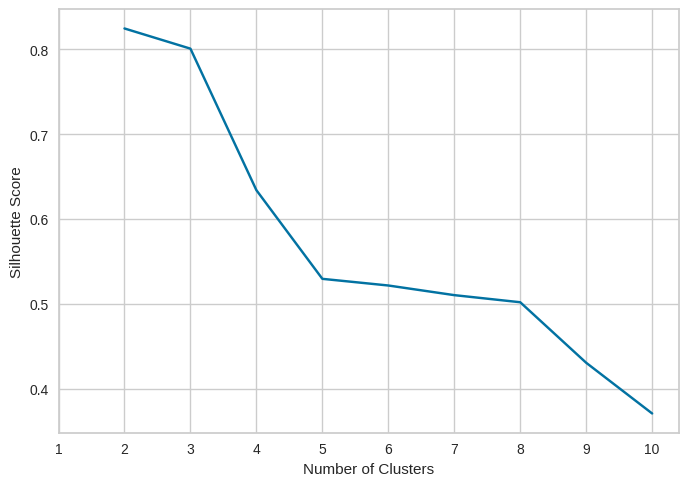

In [16]:
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import silhouette_score

df_hierar = df_scaled[['Volatility','High_Low_Spread','Average_Trading_Volume']]

# A list to hold the inertia/distortion values for each k between 2-10
scores = []

# Calculating inertia for each 'k'
for k in range(2, 11):
    Z = linkage(df_hierar, method='single')
    cluster_labels = fcluster(Z, k, criterion='maxclust')
    score = silhouette_score(df_hierar, cluster_labels, metric='euclidean')
    scores.append(score)

# Visualizing the Elbow Plot
plt.plot(range(2, 11), scores)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show();

After performing hierarchical clustering, you decide to apply your model to new incoming data (test data). Assuming the test data comes in a dataframe similar in shape to the original data you used to create the model, how would you use the same clustering arrangement with the new dataset? Explain any observations or challenges you find relevant. **(2 Points)**

**Answer 4**
---
When applying the hierarchical clustering model to new test data, it's crucial to examine the similarity in data characteristics between the original and test datasets. The model's effectiveness depends on similarities in underlying patterns, and significant deviations in data distribution can compromise the clustering results. The interaction of feature variability adds complexity, as the model's performance relies on consistent patterns across features. Challenges arise when the variability or patterns in the new dataset differ significantly from the original one.

Additionally, the computational efficiency of hierarchical clustering is important, especially for large test datasets, to ensure efficient processing. It's also important to consider the model's robustness to outliers; their presence in the new data, which were absent in the original set, could impact clustering results. Lastly, monitoring for concept drift is crucial, as clustering models assume a stable data distribution, and adapting to changes may require model retraining for accurate results. Addressing these nuances ensures the model's adaptability while maintaining the accuracy of clustering outcomes with new and diverse datasets.